<a href="https://colab.research.google.com/github/Elmir22/Data-science-ML-models-/blob/main/05_tranfer_learning_in_tensorflow_part_2_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/helper_functions.py



--2024-05-01 10:00:03--  https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-05-01 10:00:03 (69.3 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
from  helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

#mmm

In [3]:
!wget !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2024-05-01 10:00:09--  http://!wget/
Resolving !wget (!wget)... failed: Name or service not known.
wget: unable to resolve host address ‘!wget’
--2024-05-01 10:00:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.207, 74.125.68.207, 64.233.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  22.3MB/s    in 8.1s    

2024-05-01 10:00:17 (19.9 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]

FINISHED --2024-05-01 10:00:17--
Total wall clock time: 8.4s
Downloaded: 1 files, 161M in 8.1s (19.9 MB/s)


In [4]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [5]:
train_dir = "/content/10_food_classes_10_percent/train"
test_dir = "/content/10_food_classes_10_percent/test"

In [6]:
import tensorflow as tf
IMG_SIZE = (224,224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size = IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=32)
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size = IMG_SIZE,
                                                                            label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 750 files belonging to 10 classes.


In [7]:
train_data_10_percent.take(2)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [8]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [9]:
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[2.53826523e+02 2.36372452e+02 2.53698975e+02]
   [2.53571426e+02 2.39000000e+02 2.53903061e+02]
   [2.53290817e+02 2.43066330e+02 2.54081635e+02]
   ...
   [2.20443832e+02 1.73801041e+02 1.77015305e+02]
   [2.41005096e+02 1.96311264e+02 1.99193893e+02]
   [2.48612518e+02 2.09199310e+02 2.10199310e+02]]

  [[2.42239807e+02 2.24714279e+02 2.42857147e+02]
   [2.41132645e+02 2.27066330e+02 2.42066330e+02]
   [2.42913269e+02 2.31285706e+02 2.45071426e+02]
   ...
   [2.21173264e+02 1.74530472e+02 1.77744736e+02]
   [2.15433731e+02 1.70648056e+02 1.73576614e+02]
   [2.33857498e+02 1.93857498e+02 1.93857498e+02]]

  [[2.45933670e+02 2.32714279e+02 2.45714279e+02]
   [2.46500000e+02 2.35928574e+02 2.45785706e+02]
   [2.46836731e+02 2.39285706e+02 2.47928558e+02]
   ...
   [2.27836456e+02 1.81193665e+02 1.83790573e+02]
   [2.03459229e+02 1.59403137e+02 1.60816391e+02]
   [2.19520645e+02 1.79520645e+02 1.79520645e+02]]

  ...

  [[1.65607101e+02 1.63392807e+02 1.88035690e+02]
   [1

In [10]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")

x= base_model(inputs)
print(f"shape after base_model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="global_avarage_pooling_layer")(x)
print(f"After GlobalAverangePooling2D():{x.shape}")

outputs= tf.keras.layers.Dense(10, activation = "softmax", name="output_layer")(x)

model_0 = tf.keras.Model(inputs, outputs)

model_0.compile(loss='categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs=5,
                                 steps_per_epoch=len(train_data_10_percent),
                                 validation_data= test_data_10_percent,
                                 validation_steps=int(0.25*len(test_data_10_percent)),
                                 callbacks = [create_tensorboard_callback("transfer_learning","10_percent_feature_extract")])

24274472/24274472 [==============================] - 2s 0us/step
shape after base_model: (None, 7, 7, 1280)
After GlobalAverangePooling2D():(None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extract/20240501-100035
Epoch 1/5
24/24 [==============================] - 18s 229ms/step - loss: 1.9601 - accuracy: 0.3427 - val_loss: 1.3859 - val_accuracy: 0.7031
Epoch 2/5
24/24 [==============================] - 3s 100ms/step - loss: 1.1913 - accuracy: 0.7360 - val_loss: 0.9459 - val_accuracy: 0.8229
Epoch 3/5
24/24 [==============================] - 3s 94ms/step - loss: 0.8652 - accuracy: 0.8147 - val_loss: 0.6840 - val_accuracy: 0.8698
Epoch 4/5
24/24 [==============================] - 3s 98ms/step - loss: 0.7100 - accuracy: 0.8413 - val_loss: 0.6041 - val_accuracy: 0.8958
Epoch 5/5
24/24 [==============================] - 3s 115ms/step - loss: 0.6140 - accuracy: 0.8573 - val_loss: 0.5261 - val_accuracy: 0.8854


In [11]:
# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)


# 2. Freeze the base model (so the pre-learned patterns remain)
base_model.trainable = False

# 3. Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")



# 5. Pass the inputs to the base_model (note: using tf.keras.applications, EfficientNetV2 inputs don't have to be normalized)
x = base_model(inputs)
# Check data shape after passing it to base_model
print(f"Shape after base_model: {x.shape}")

# 6. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_0.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 10. Fit the model (we use less steps for validation so it's faster)
history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs=5,
                                 steps_per_epoch=len(train_data_10_percent),
                                 validation_data=test_data_10_percent,
                                 # Go through less of the validation data so epochs are faster (we want faster experiments!)
                                 validation_steps=int(0.25 * len(test_data_10_percent)),
                                 # Track our model's training logs for visualization later
                                 callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_feature_extract")])

Shape after base_model: (None, 7, 7, 1280)
After GlobalAveragePooling2D(): (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extract/20240501-100112
Epoch 1/5
24/24 [==============================] - 13s 188ms/step - loss: 1.8830 - accuracy: 0.4093 - val_loss: 1.3559 - val_accuracy: 0.7344
Epoch 2/5
24/24 [==============================] - 3s 99ms/step - loss: 1.1470 - accuracy: 0.7480 - val_loss: 0.8821 - val_accuracy: 0.8333
Epoch 3/5
24/24 [==============================] - 6s 220ms/step - loss: 0.8583 - accuracy: 0.8067 - val_loss: 0.7010 - val_accuracy: 0.8646
Epoch 4/5
24/24 [==============================] - 5s 167ms/step - loss: 0.6790 - accuracy: 0.8533 - val_loss: 0.5770 - val_accuracy: 0.8750
Epoch 5/5
24/24 [==============================] - 4s 127ms/step - loss: 0.5963 - accuracy: 0.8653 - val_loss: 0.4571 - val_accuracy: 0.9375


In [12]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_2
1 rescaling_1
2 normalization_1
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block2a_expand_conv
10 block2a_expand_bn
11 block2a_expand_activation
12 block2a_project_conv
13 block2a_project_bn
14 block2b_expand_conv
15 block2b_expand_bn
16 block2b_expand_activation
17 block2b_project_conv
18 block2b_project_bn
19 block2b_drop
20 block2b_add
21 block3a_expand_conv
22 block3a_expand_bn
23 block3a_expand_activation
24 block3a_project_conv
25 block3a_project_bn
26 block3b_expand_conv
27 block3b_expand_bn
28 block3b_expand_activation
29 block3b_project_conv
30 block3b_project_bn
31 block3b_drop
32 block3b_add
33 block4a_expand_conv
34 block4a_expand_bn
35 block4a_expand_activation
36 block4a_dwconv2
37 block4a_bn
38 block4a_activation
39 block4a_se_squeeze
40 block4a_se_reshape
41 block4a_se_reduce
42 block4a_se_expand
43 block4a_se_excite
44 block4a_project_conv
45 block4a_project_bn
46 block4b_expand_conv
47 b

In [13]:
base_model.summary()

Model: "efficientnetv2-b0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling_1 (Rescaling)     (None, None, None, 3)        0         ['input_2[0][0]']             
                                                                                                  
 normalization_1 (Normaliza  (None, None, None, 3)        0         ['rescaling_1[0][0]']         
 tion)                                                                                            
                                                                                                  
 stem_conv (Conv2D)          (None, None, None, 32)       864       ['normalizatio

In [14]:
#check summary of model
model_0.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 5919312 (22.58 MB)
________________

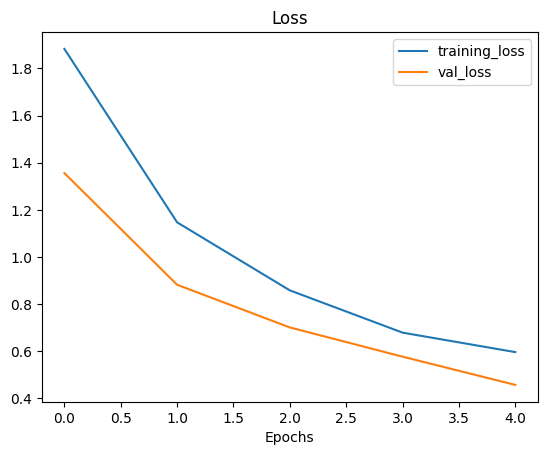

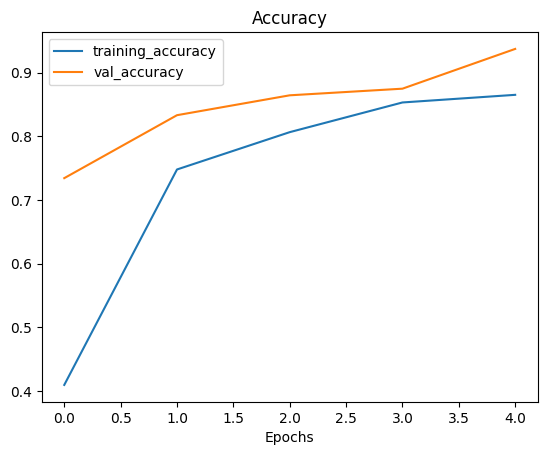

In [15]:
plot_loss_curves(history_10_percent)

In [16]:
input_shape = (1,4,4,3)
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}\n")

global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n {global_average_pooled_tensor}\n")

print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of 2D globa; average pooled input tensor: {global_average_pooled_tensor.shape}")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338894  0.97772694]
   [ 0.24694404  0.20573746 -0.52562326]
   [ 0.32410017  0.02545409 -0.10638496]
   [-0.63694745  1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815628  0.23479679 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

2D global average pooled random tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]]

Shape of input tensor: (1, 4, 4, 3)
Shape of 2D globa; average pooled input tensor: (1, 3)


In [17]:
tf.reduce_mean(input_tensor, axis=[1,2]) # average across the middle axes

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

#transfer learning experiments

In [18]:
# Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

# Create training and test dirs
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

--2024-05-01 10:01:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.207, 64.233.170.207, 142.251.175.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  21.9MB/s    in 6.8s    

2024-05-01 10:02:01 (18.6 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [19]:
walk_through_dir("/content/10_food_classes_1_percent")

There are 2 directories and 0 images in '/content/10_food_classes_1_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '/content/10_food_classes_1_pe

In [20]:
import tensorflow as tf
IMG_SIZE = (224,224)

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode = "categorical",
                                                                           batch_size=32, # default
                                                                           image_size= IMG_SIZE)
test_dir = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                           label_mode = "categorical",
                                                                           batch_size=32, # default
                                                                           image_size= IMG_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    #preprocesing.Rescaling(1./255) keep for ResNet50v2, remove for EfficientNetv2b0
], name= "data_augmention"
                                     )

(-0.5, 489.5, 577.5, -0.5)

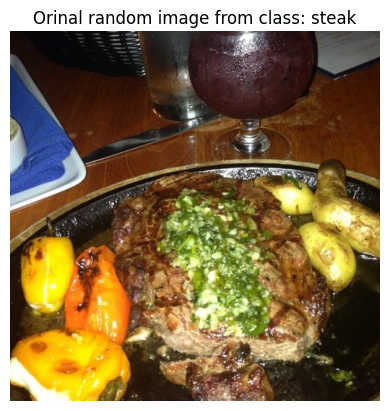

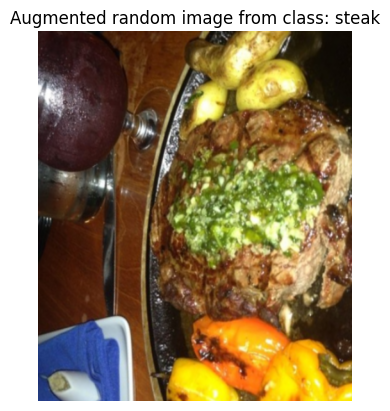

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_1_percent.class_names)
target_dir = "/content/10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + '/' + random_image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Orinal random image from class: {target_class}")
plt.axis(False) #turn off axes

#Augmented
augmented_img = data_augmentation(tf.expand_dims(img, axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False)

In [23]:
input_shape = (224,224,3)
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False
#create a input
inputs = layers.Input(shape= input_shape, name="input_layer")

#add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

#give base_model inputs (after augmention) and don't train it
x = base_model(x, training=False)

#pool output features of base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

#put a dense layer on as the output
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

#make a model with inputs and outputs
model_1 = keras.Model(inputs, outputs)

#compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_10_percent= model_1.fit(train_data_1_percent,
                                epochs=5,
                                steps_per_epoch=len(train_data_1_percent),
                                validation_data=test_dir,
                                validation_steps=int(0.25*len(test_dir)), #validate for less steps
                                #track model trainig logs
                                callbacks=[create_tensorboard_callback("transfer_learning", "1_percent_data_aug")])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20240501-100213
Epoch 1/5
3/3 [==============================] - 22s 4s/step - loss: 2.3871 - accuracy: 0.0857 - val_loss: 2.2233 - val_accuracy: 0.2171
Epoch 2/5
3/3 [==============================] - 5s 2s/step - loss: 2.1537 - accuracy: 0.2429 - val_loss: 2.1321 - val_accuracy: 0.2911
Epoch 3/5
3/3 [==============================] - 6s 2s/step - loss: 1.9931 - accuracy: 0.3143 - val_loss: 2.0332 - val_accuracy: 0.3438
Epoch 4/5
3/3 [==============================] - 5s 2s/step - loss: 1.9057 - accuracy: 0.4000 - val_loss: 1.9478 - val_accuracy: 0.3816
Epoch 5/5
3/3 [==============================] - 8s 3s/step - loss: 1.7222 - accuracy: 0.5000 - val_loss: 1.8730 - val_accuracy: 0.4326


In [24]:
results_1_percent_data_aug = model_1.evaluate(test_dir)
results_1_percent_data_aug

79/79 [==============================] - 8s 98ms/step - loss: 1.8477 - accuracy: 0.4524


[1.8476589918136597, 0.45239999890327454]

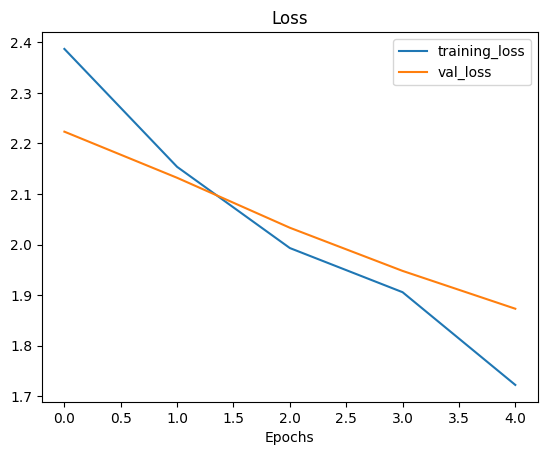

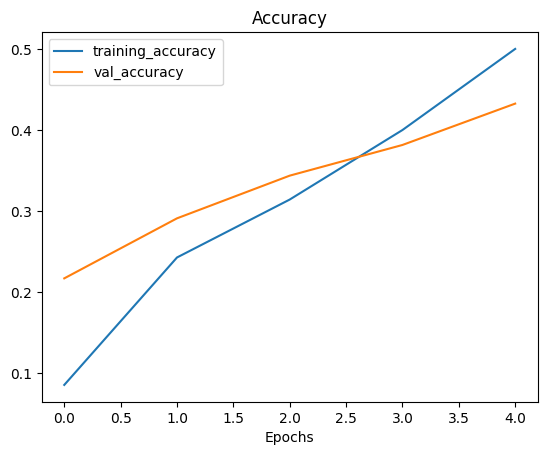

In [25]:
plot_loss_curves(history_10_percent)

# Model 2 : Feature extraction transfer learning with 10% of data and data augmention

In [26]:
!wget !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2024-05-01 10:03:12--  http://!wget/
Resolving !wget (!wget)... failed: Name or service not known.
wget: unable to resolve host address ‘!wget’
--2024-05-01 10:03:12--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.207, 64.233.170.207, 142.251.175.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M  22.1MB/s    in 8.3s    

2024-05-01 10:03:21 (19.4 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]

FINISHED --2024-05-01 10:03:21--
Total wall clock time: 8.6s
Downloaded: 1 files, 161M in 8.3s (19.4 MB/s)


In [27]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [28]:
train_dir = "/content/10_food_classes_10_percent/train"
test_dir = "/content/10_food_classes_10_percent/test"

In [29]:
import tensorflow as tf
IMG_SIZE = (224,224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size = IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=32)
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size = IMG_SIZE,
                                                                            label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 750 files belonging to 10 classes.


In [30]:
input_shape = (224,224,3)
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False
#create a input
inputs = layers.Input(shape= input_shape, name="input_layer")

#add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

#give base_model inputs (after augmention) and don't train it
x = base_model(x, training=False)

#pool output features of base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

#put a dense layer on as the output
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

#make a model with inputs and outputs
model_1 = keras.Model(inputs, outputs)

#compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_10_percent= model_1.fit(train_data_10_percent,
                                epochs=5,
                                steps_per_epoch=len(train_data_10_percent),
                                validation_data=test_data_10_percent,
                                validation_steps=int(0.25*len(test_data_10_percent)), #validate for less steps
                                )

Epoch 1/5
24/24 [==============================] - 45s 1s/step - loss: 2.0425 - accuracy: 0.3147 - val_loss: 1.5489 - val_accuracy: 0.6146
Epoch 2/5
24/24 [==============================] - 29s 1s/step - loss: 1.4408 - accuracy: 0.6253 - val_loss: 1.0866 - val_accuracy: 0.7344
Epoch 3/5
24/24 [==============================] - 23s 944ms/step - loss: 1.1085 - accuracy: 0.7400 - val_loss: 0.9383 - val_accuracy: 0.7448
Epoch 4/5
24/24 [==============================] - 22s 889ms/step - loss: 0.9413 - accuracy: 0.7747 - val_loss: 0.7688 - val_accuracy: 0.7969
Epoch 5/5
24/24 [==============================] - 22s 839ms/step - loss: 0.8252 - accuracy: 0.7973 - val_loss: 0.6915 - val_accuracy: 0.8281


In [31]:
results_10_percent_data_aug = model_1.evaluate(test_data_10_percent)
results_10_percent_data_aug

24/24 [==============================] - 2s 72ms/step - loss: 0.6493 - accuracy: 0.8347


[0.6492689251899719, 0.8346666693687439]

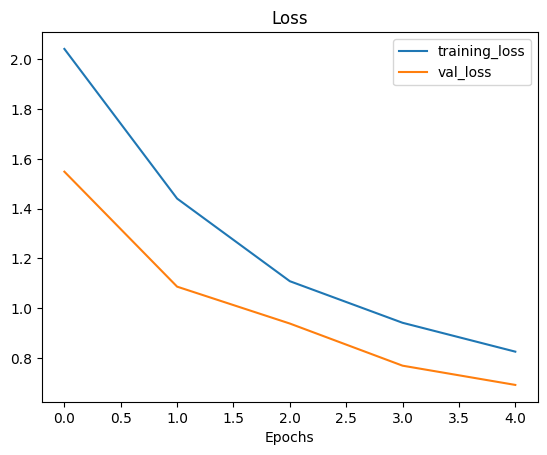

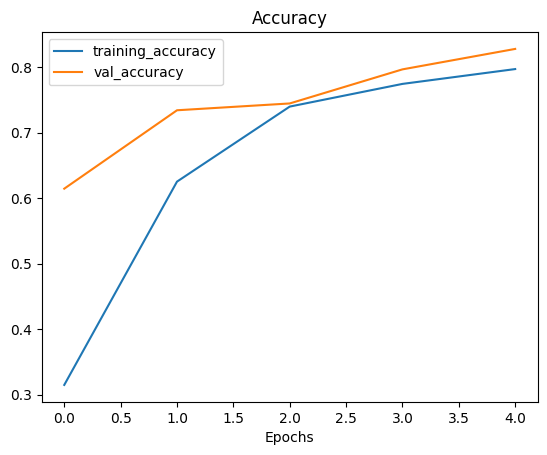

In [32]:
plot_loss_curves(history_10_percent)

In [44]:
def create_base_model(input_shape: tuple[int, int, int] = (224, 224, 3),
                      output_shape: int =10,
                      learning_rate: float = 0.001,
                      training: bool = False) -> tf.keras.Model:

    base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
    base_model.trainable = training


    inputs = layers.Input(shape=input_shape, name="input_layer")
    x = data_augmentation(inputs)
    x = base_model(x, training=False)
    x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
    outputs = layers.Dense(units=output_shape, activation="softmax", name="output_layer")(x)
    model = tf.keras.Model(inputs, outputs)

    model.compile(loss="categorical_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=["accuracy"])

    return model

model_2 = create_base_model()

#Creating a ModelCheckpoint callback

In [45]:
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         save_freq="epoch",
                                                         verbose=1)

In [48]:
initial_epochs = 5
history_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                          epochs= initial_epochs,
                                          validation_data=test_data_10_percent,
                                          validation_steps = int(0.25*len(test_data_10_percent)),
                                          callbacks = [checkpoint_callback])

Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0157 - accuracy: 0.3400
Epoch 1: val_loss improved from inf to 1.52494, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 32s 881ms/step - loss: 2.0157 - accuracy: 0.3400 - val_loss: 1.5249 - val_accuracy: 0.6510
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3753 - accuracy: 0.6787
Epoch 2: val_loss improved from 1.52494 to 1.09114, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 18s 714ms/step - loss: 1.3753 - accuracy: 0.6787 - val_loss: 1.0911 - val_accuracy: 0.7448
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0931 - accuracy: 0.7387
Epoch 3: val_loss improved from 1.09114 to 0.91532, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 19s 775ms/step - loss: 1.0931 - accuracy: 0.7387 - val

In [49]:
results_10_percent_data_aug = model_2.evaluate(test_data_10_percent)
results_10_percent_data_aug

24/24 [==============================] - 2s 59ms/step - loss: 0.6355 - accuracy: 0.8467


[0.6354833841323853, 0.846666693687439]

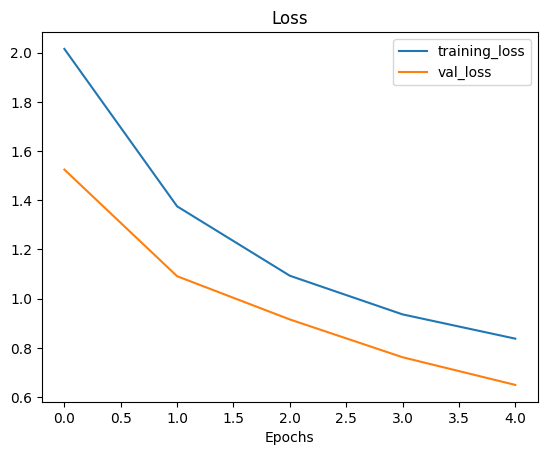

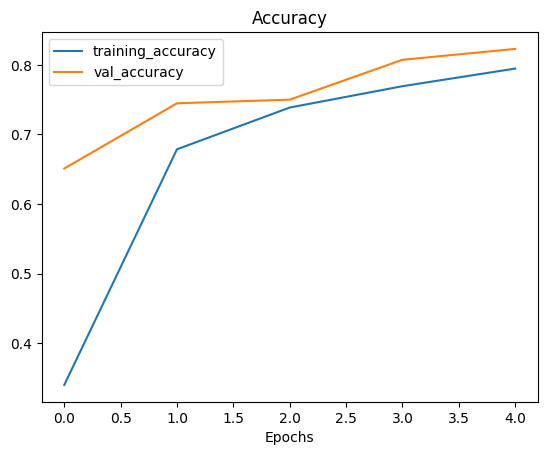

In [50]:
plot_loss_curves(history_10_percent_data_aug)

In [51]:
model_2.load_weights(checkpoint_path)
loaded_weights_model_results = model_2.evaluate(test_data_10_percent)

24/24 [==============================] - 3s 68ms/step - loss: 0.6355 - accuracy: 0.8467


In [ ]:
results_10_percent_data_aug = loaded_weights_model_results

In [52]:
import numpy as np
#check to see if loaded model results are very close to native model results (should output True)
np.isclose(np.array(results_10_percent_data_aug), np.array(loaded_weights_model_results))

array([ True,  True])

# Model 3 : Fine-tuning an existing model on 10% of the data

In [53]:
model_2.layers

In [55]:
for layer_number, layer in enumerate(model_2.layers):
  print(f"layer number: {layer_number} | layer name: {layer.name} | Trainable? {layer.trainable}")

layer number: 0 | layer name: input_layer | Trainable? True
layer number: 1 | layer name: data_augmention | Trainable? True
layer number: 2 | layer name: efficientnetv2-b0 | Trainable? False
layer number: 3 | layer name: global_average_pooling_layer | Trainable? True
layer number: 4 | layer name: output_layer | Trainable? True


In [56]:
model_2.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmention (Sequentia  (None, None, None, 3)     0         
 l)                                                              
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                1281

In [57]:
model_2_base_model = model_2.layers[2]
model_2_base_model.name

'efficientnetv2-b0'

In [58]:
print(len(model_2_base_model.trainable_variables))

0


In [60]:
for layer_number, layer in enumerate(model_2_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_15 False
1 rescaling_14 False
2 normalization_14 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwcon

In [61]:
model_2_base_model.trainable = True

for layer in model_2_base_model.layers[:-10]:
  layer.trainable = False



model_2.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])


In [62]:
for layer_number, layer in enumerate(model_2_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_15 False
1 rescaling_14 False
2 normalization_14 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwcon

In [63]:
print(len(model_2.trainable_variables))

12


In [64]:
fine_tune_epochs = initial_epochs + 5

history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                               epochs = fine_tune_epochs,
                                               validation_data= test_data_10_percent,
                                               initial_epoch = history_10_percent_data_aug.epoch[-1],
                                               validation_steps = int(0.25*len(test_data_10_percent)))

Epoch 5/10
24/24 [==============================] - 30s 810ms/step - loss: 0.6905 - accuracy: 0.8187 - val_loss: 0.5184 - val_accuracy: 0.8229
Epoch 6/10
24/24 [==============================] - 14s 575ms/step - loss: 0.6036 - accuracy: 0.8240 - val_loss: 0.5167 - val_accuracy: 0.8229
Epoch 7/10
24/24 [==============================] - 14s 559ms/step - loss: 0.5507 - accuracy: 0.8320 - val_loss: 0.5481 - val_accuracy: 0.8281
Epoch 8/10
24/24 [==============================] - 14s 567ms/step - loss: 0.4927 - accuracy: 0.8453 - val_loss: 0.4517 - val_accuracy: 0.8750
Epoch 9/10
24/24 [==============================] - 15s 626ms/step - loss: 0.4644 - accuracy: 0.8533 - val_loss: 0.4109 - val_accuracy: 0.8802
Epoch 10/10
24/24 [==============================] - 16s 623ms/step - loss: 0.4626 - accuracy: 0.8560 - val_loss: 0.4919 - val_accuracy: 0.8594


In [65]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.3400000035762787, 0.6786666512489319, 0.7386666536331177, 0.7693333625793457, 0.7946666479110718, 0.8186666369438171, 0.8240000009536743, 0.8320000171661377, 0.8453333377838135, 0.8533333539962769, 0.8560000061988831]


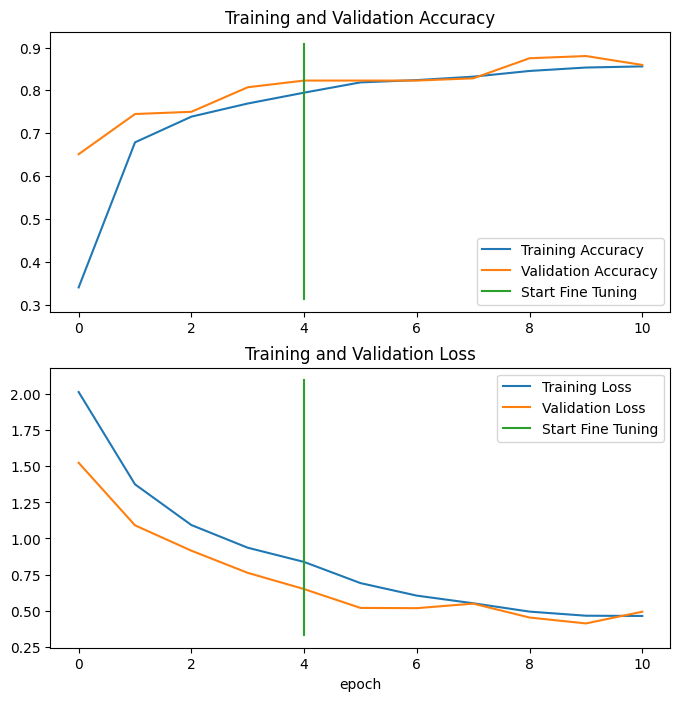

In [66]:
compare_historys(original_history = history_10_percent_data_aug,
                 new_history = history_fine_10_percent_data_aug,
                 initial_epochs=5)

##Model:4 Fine tuning an existing model all of the data

In [67]:
# Download and unzip 10 classes of data with all images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

# Setup data directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

--2024-05-01 11:12:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.207, 142.251.10.207, 142.251.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  22.6MB/s    in 24s     

2024-05-01 11:12:30 (21.0 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [69]:
walk_through_dir('10_food_classes_all_data')

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 

In [70]:
import tensorflow as tf
IMG_SIZE= (224,224)
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                 label_mode="categorical",
                                                                                 image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [71]:
model_4 = create_base_model(learning_rate=0.0001)

In [72]:
model_4.load_weights(checkpoint_path)

In [73]:
model_4.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmention (Sequentia  (None, None, None, 3)     0         
 l)                                                              
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                128

In [74]:
model_4.evaluate(test_data)

79/79 [==============================] - 13s 62ms/step - loss: 0.6605 - accuracy: 0.8196


[0.6605326533317566, 0.819599986076355]

In [75]:
for layer_number, layer in enumerate(model_4.layers):
  print(layer_number, layer.name,layer.trainable)

0 input_layer True
1 data_augmention True
2 efficientnetv2-b0 False
3 global_average_pooling_layer True
4 output_layer True


In [79]:
model_4_base_model = model_4.layers[2]
model_4_base_model.trainable = True

for layer in model_4_base_model.layers[:-10]:
  layer.trainable = False


In [90]:
for layer_number, layer in enumerate(model_4_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_16 False
1 rescaling_15 False
2 normalization_15 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwcon

In [91]:
model_4.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])


fine_tune_epochs = initial_epochs + 5

history_fine_10_classes_full = model_2.fit(train_data_10_classes_full,
                                               epochs = fine_tune_epochs,
                                               validation_data= test_data,
                                               initial_epoch = history_10_percent_data_aug.epoch[-1],
                                               validation_steps = int(0.25*len(test_data)))

Epoch 5/10
235/235 [==============================] - 132s 553ms/step - loss: 0.6562 - accuracy: 0.7900 - val_loss: 0.3334 - val_accuracy: 0.8865
Epoch 6/10
235/235 [==============================] - 104s 440ms/step - loss: 0.5818 - accuracy: 0.8128 - val_loss: 0.2888 - val_accuracy: 0.9062
Epoch 7/10
235/235 [==============================] - 88s 374ms/step - loss: 0.5266 - accuracy: 0.8333 - val_loss: 0.2673 - val_accuracy: 0.9095
Epoch 8/10
235/235 [==============================] - 73s 306ms/step - loss: 0.4861 - accuracy: 0.8427 - val_loss: 0.2871 - val_accuracy: 0.8964
Epoch 9/10
235/235 [==============================] - 66s 277ms/step - loss: 0.4623 - accuracy: 0.8489 - val_loss: 0.2641 - val_accuracy: 0.9178
Epoch 10/10
235/235 [==============================] - 61s 258ms/step - loss: 0.4404 - accuracy: 0.8580 - val_loss: 0.2234 - val_accuracy: 0.9309


In [92]:
results_fine_tune_full_data = model_4.evaluate(test_data)
results_fine_tune_full_data

79/79 [==============================] - 9s 73ms/step - loss: 0.6605 - accuracy: 0.8196


[0.6605322957038879, 0.819599986076355]

5
11
[0.3400000035762787, 0.6786666512489319, 0.7386666536331177, 0.7693333625793457, 0.7946666479110718, 0.7900000214576721, 0.8127999901771545, 0.8333333134651184, 0.8426666855812073, 0.8489333391189575, 0.8579999804496765]


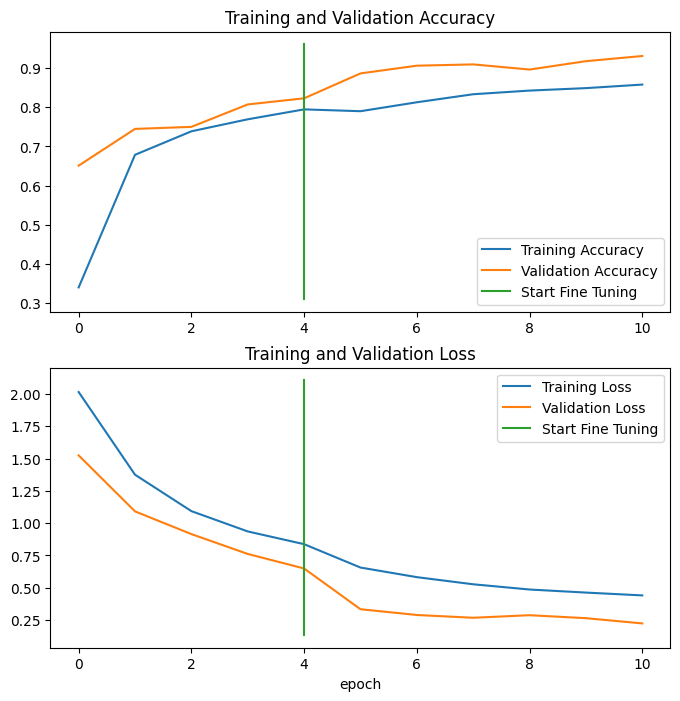

In [93]:
compare_historys(original_history = history_10_percent_data_aug,
                 new_history = history_fine_10_classes_full,
                 initial_epochs=5)